In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
df = spark.read.csv("sample_data/BostonHousing.csv")
df2 = spark.read.option("header",True) \
     .csv("sample_data/BostonHousing.csv")

df2.show(5)

+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632| 18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|
|0.02731|  0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729|  0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237|  0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905|  0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
#counting the number of rows
df2.count()

506

In [ ]:
df2.schema

StructType(List(StructField(crim,DoubleType,true),StructField(zn,DoubleType,true),StructField(indus,DoubleType,true),StructField(chas,DoubleType,true),StructField(nox,DoubleType,true),StructField(rm,DoubleType,true),StructField(age,DoubleType,true),StructField(dis,DoubleType,true),StructField(rad,DoubleType,true),StructField(tax,DoubleType,true),StructField(ptratio,DoubleType,true),StructField(b,DoubleType,true),StructField(lstat,DoubleType,true),StructField(medv,DoubleType,true)))

In [ ]:
df2.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: double (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
df2.schema.fields

[StructField(crim,DoubleType,true),
 StructField(zn,DoubleType,true),
 StructField(indus,DoubleType,true),
 StructField(chas,DoubleType,true),
 StructField(nox,DoubleType,true),
 StructField(rm,DoubleType,true),
 StructField(age,DoubleType,true),
 StructField(dis,DoubleType,true),
 StructField(rad,DoubleType,true),
 StructField(tax,DoubleType,true),
 StructField(ptratio,DoubleType,true),
 StructField(b,DoubleType,true),
 StructField(lstat,DoubleType,true),
 StructField(medv,DoubleType,true)]

In [ ]:
##dropping column "b"
df2.drop("b") \
  .printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: double (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
from pyspark.sql.functions import round, col
for c in df2.columns:
    df2 = df2.withColumn(c, round(c, 2))


In [ ]:
df2.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|     b|lstat|medv|
+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8|392.83| 4.03|34.7|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7|394.63| 2.94|33.4|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 396.9| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+
only showing top 5 rows



In [ ]:
age10=df2.age*1.1

In [ ]:
age10

Column<b'(age * 1.1)'>

In [ ]:
age_list=df2.select("age").rdd.flatMap(lambda x:x).collect()

In [ ]:
age_list

[65.2,
 78.9,
 61.1,
 45.8,
 54.2,
 58.7,
 66.6,
 96.1,
 100.0,
 85.9,
 94.3,
 82.9,
 39.0,
 61.8,
 84.5,
 56.5,
 29.3,
 81.7,
 36.6,
 69.5,
 98.1,
 89.2,
 91.7,
 100.0,
 94.1,
 85.7,
 90.3,
 88.8,
 94.4,
 87.3,
 94.1,
 100.0,
 82.0,
 95.0,
 96.9,
 68.2,
 61.4,
 41.5,
 30.2,
 21.8,
 15.8,
 2.9,
 6.6,
 6.5,
 40.0,
 33.8,
 33.3,
 85.5,
 95.3,
 62.0,
 45.7,
 63.0,
 21.1,
 21.4,
 47.6,
 21.9,
 35.7,
 40.5,
 29.2,
 47.2,
 66.2,
 93.4,
 67.8,
 43.4,
 59.5,
 17.8,
 31.1,
 21.4,
 36.8,
 33.0,
 6.6,
 17.5,
 7.8,
 6.2,
 6.0,
 45.0,
 74.5,
 45.8,
 53.7,
 36.6,
 33.5,
 70.4,
 32.2,
 46.7,
 48.0,
 56.1,
 45.1,
 56.8,
 86.3,
 63.1,
 66.1,
 73.9,
 53.6,
 28.9,
 77.3,
 57.8,
 69.6,
 76.0,
 36.9,
 62.5,
 79.9,
 71.3,
 85.4,
 87.4,
 90.0,
 96.7,
 91.9,
 85.2,
 97.1,
 91.2,
 54.4,
 81.6,
 92.9,
 95.4,
 84.2,
 88.2,
 72.5,
 82.6,
 73.1,
 65.2,
 69.7,
 84.1,
 92.9,
 97.0,
 95.8,
 88.4,
 95.6,
 96.0,
 98.8,
 94.7,
 98.9,
 97.7,
 97.9,
 95.4,
 98.4,
 98.2,
 93.5,
 98.4,
 98.2,
 97.9,
 93.6,
 100.0,
 100.0,
 

In [ ]:
df2=df2.withColumn('Age10',age10)

In [ ]:
df2.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|     b|lstat|medv|             Age10|
+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+------------------+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 396.9| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8|392.83| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7|394.63| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 396.9| 5.33|36.2|59.620000000000005|
+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+------------------+
only showing top 5 rows



In [ ]:
for c in df2.columns:
    df2 = df2.withColumn(c, round(c, 2))


In [ ]:
df2.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|     b|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+-----+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|71.72|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 396.9| 9.14|21.6|86.79|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8|392.83| 4.03|34.7|67.21|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7|394.63| 2.94|33.4|50.38|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 396.9| 5.33|36.2|59.62|
+----+----+-----+----+----+----+----+----+---+-----+-------+------+-----+----+-----+
only showing top 5 rows



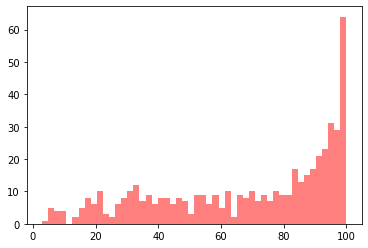

In [ ]:
import matplotlib.pyplot as plt
bins=50
n,bins, patches= plt.hist(age_list,bins,facecolor="red",alpha=0.5)

In [ ]:
df2.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|              

In [ ]:
import pandas

In [ ]:
pd=df2.toPandas()

In [ ]:
pd.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Age10
501,0.06,0.0,11.93,0.0,0.57,6.59,69.1,2.48,1.0,273.0,21.0,391.99,9.67,22.4,76.01
502,0.05,0.0,11.93,0.0,0.57,6.12,76.7,2.29,1.0,273.0,21.0,396.90,9.08,20.6,84.37
503,0.06,0.0,11.93,0.0,0.57,6.98,91.0,2.17,1.0,273.0,21.0,396.90,5.64,23.9,100.10
504,0.11,0.0,11.93,0.0,0.57,6.79,89.3,2.39,1.0,273.0,21.0,393.45,6.48,22.0,98.23
505,0.05,0.0,11.93,0.0,0.57,6.03,80.8,2.51,1.0,273.0,21.0,396.90,7.88,11.9,88.88
